# Goal: 

Stakeholders want to know if sales are ignificantly differnet among various TV and influencer promotion types

<div style="background-color:#f0f0f0; padding:10px; border-radius:5px;">
    <h2 style="color:#333333; text-align:center;">Executive Summary</h2>
    <p style="color:#555555; font-size:16px;">
        The TV feature explains approximately <strong>87.1%</strong> of the variance in Sales, as indicated by the R-squared value of <strong>0.871</strong>. Influencer feature is not taken into consideration as it does not have significant affect on the Sales.
    </p>
    <h2 style="color:#333333; text-align:center;">Interpreting Coefficients</h2>
    <ul style="color:#555555; font-size:16px;">
        <li>
            Using a high TV promotion budget instead of a low TV promotion budget is estimated to increase sales by approximately <strong>209.8691 million dollars</strong>, with a 95% confidence interval ranging from <strong>203.203 million</strong> to <strong>216.535 million dollars</strong>, taking 'High' TV category as the reference.
        </li>
        <li>
            Using a high TV promotion budget instead of a medium TV promotion budget is estimated to increase sales by approximately <strong>105.4952 million dollars</strong>, with a 95% confidence interval ranging from <strong>98.859 million</strong> to <strong>112.131 million dollars</strong>, again with 'High' TV category as the reference.
        </li>
    </ul>
    <p style="color:#555555; font-size:16px;">
        The statistical significance of the coefficients for both the LOW and MEDIUM levels of TV is affirmed by their <strong>p-values</strong> being less than <strong>0.05</strong>.
    </p>
</div>


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# load the dataset:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [3]:
# Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [4]:
# Drop nulls 
data.dropna(inplace=True)

In [5]:
# Verifying nulls
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [9]:
# Converting objetc to category
data['TV'] = data['TV'].astype('category')
data['Influencer'] = data['Influencer'].astype('category')

In [10]:
data.describe(include = 'category')

,TV,Influencer
count,569,569
unique,3,4
top,Medium,Mega
freq,197,147


Text(0.5, 1.0, 'Influencer VS Sales')

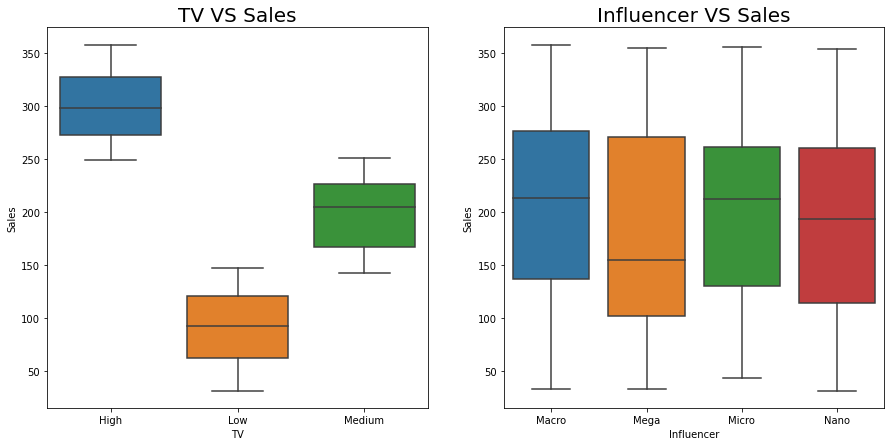

In [46]:
fig, axes = plt.subplots(1,2,figsize =(15,7))

sns.boxplot(data = data, x='TV', y = 'Sales', ax = axes[0])
axes[0].set_title('TV VS Sales', size = 20)

sns.boxplot(data = data, x='Influencer', y = 'Sales', ax = axes[1])
axes[1].set_title('Influencer VS Sales', size = 20)

In [17]:
# Checking groups of TV
data.groupby('TV')['Sales'].mean()

TV
High      300.529591
Low        91.716309
Medium    199.023461
Name: Sales, dtype: float64

In [19]:
# Checking groups of Influencer
data.groupby('Influencer')['Sales'].mean()

Influencer
Macro    206.641805
Mega     180.385096
Micro    198.655080
Nano     189.742830
Name: Sales, dtype: float64

**Observation**:

1. There is significant difference in sales when the type of TV promotion changes
1. There is no significant difference in sales when the type of Influencer promotion changes, though there is slight variation but not significant. Hence we will not consider 'Influencer' for our model building as it has very little influence compared to TV levels.


**The significance of the difference in sales with respect to TV promotions can be tested with one-way ANOVA.**

# Model building

In [20]:
ols_formula = 'Sales ~ C(TV)'

model = ols(formula=ols_formula, data=data).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          8.81e-256
Time:                        09:13:45   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check model Assumptions:
- Linearity
- Independant Observation
- Normality
- Homoscedasticity (constant variation)
- No Multicollinearity 


### Assumption 1: Linearity 

Because the model does not have any continuous independent variables, the linearity assumption is not required.


### Assumption 2: Ind Observation
As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

### Assunption 3: Normality
The residual values follow a normal distribution and form a diagonal line in the qqplot

Text(0.5, 1.0, 'Theoritical Quantile Plot')

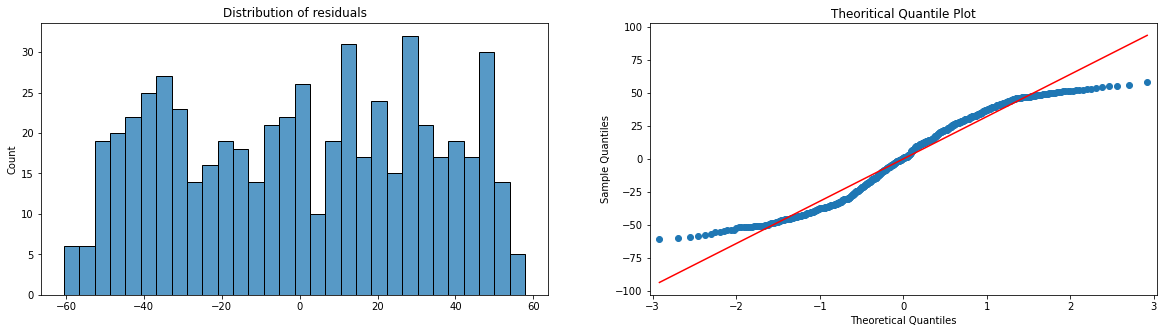

In [31]:
fig, axes = plt.subplots(1,2, figsize = (20,5))

sns.histplot(data=model.resid, ax = axes[0], bins= 30)
axes[0].set_title('Distribution of residuals')

sm.qqplot(data = model.resid, line = 's', ax = axes[1])
axes[1].set_title('Theoritical Quantile Plot')

**Observation:**
There is reasonable concern that the normality assumption is not met when TV is used as the independent variable predicting Sales. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

### Assumption 4: Homoscedasticity (Constant variance)


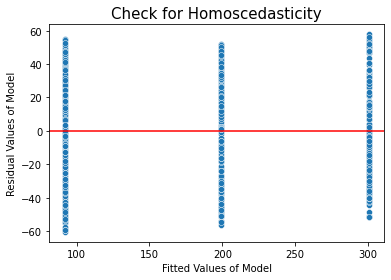

In [37]:
sns.scatterplot(x= model.fittedvalues, y = model.resid)
plt.title('Check for Homoscedasticity', size = 15)
plt.xlabel('Fitted Values of Model')
plt.ylabel('Residual Values of Model')
plt.axhline(0, color = 'red')

**Observation**:
- We have groups of data points which is due the 3 groups of the TV feature variable.
- The distribution of these points acroos each levels of TV (High, Medium and Low) shows variance across the plot
- Our assumption is thus not violated as there is constant variance(equal spread) across all levels.

### Assumption 5: No multicollinearity
As we have only one independant variable in our model there is no multicollinerity among independant variable. This our assumption is not violated.

# Results and evalution of the model

- The TV features describes almost 87.4% of the variation in Sales, since R Adjusted is 0.874
- Interpreting Coefficients:
    - Estimated avg difference between High and Low TV sales is about 208.83 Million ranging from [202.274-215.353] with 'High' TV category as reference
    - Estimated avg difference between High and Medium TV sales is about 101.51 Million from [94.97-108.038] with 'High' TV category as reference
- The coefficients are statsically significant since we have p-values less than 0.05 for LOW and MEDIUM levels of TV


How can the model be imporved?
- A more granular view of the levels of the TV promotions such as additional categories or even the actual budgets for each level. Furthermore, inclusion of other featuers like location of the marketing campaign or time of the year may increase model accuracy

## One way ANOVA test:

We have to test if there is a statiscally significant difference in the sales wrt TV promotions we will perform one way ANOVA test.

### State the hypothesis:
$H_0$ = There is no differnece in Sales based on TV promotion budget

$H_1$ = There is a difference in Sales based on the TV promotion budget

In [38]:
# Perform the one way anova test:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


In [40]:
# More readable numbers:

def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable
    {[argument_index_or_keyword]:[width][.precision][type]}
    """
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

sm.stats.anova_lm(model, typ = 1).apply(lambda x: x.apply('{0:.8f}'.format))

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.00000000,4052692.11805894,2026346.05902947,1971.45573654,0.00000000
Residual,566.00000000,581758.87399027,1027.84253355,nan,nan


**Observstion**
Since our p-value is less than 0.05 (95% confidence level) we reject our Null hypothesis as the results are statiscally significant.
Thus we conclude that there is statiscally significant difference in the Sales with respect to the type of TV promotions, that is, High, Medium and Low.

## Perform Post_hoc test 
To validate the rejection of Null hypothesis:

In [42]:
tukey = pairwise_tukeyhsd(endog = data['Sales'],groups = data['TV'], alpha = 0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,-0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,-0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,-0.0,99.7066,114.9077,True


**Observations:

- The first row, which compares the High and Low TV groups, indicates that you can reject the null hypothesis that there is no significant difference between the Sales of these two groups.
- You can also reject the null hypotheses for the two other pairwise comparisons that compare High to Medium and Low to Medium.
- A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.
- The results were that Sales is not the same between any pair of TV groups.

## Executive Summary
- The TV feature explains approximately **87.1%** of the variance in Sales, as indicated by the R-squared value of **0.871**. Influencer feature is not taken into consideration as it does not have significant affect on the Sales.

## Interpreting Coefficients
- Using a high TV promotion budget instead of a low TV promotion budget is estimated to increase sales by approximately **209.8691 million dollars**, with a 95% confidence interval ranging from **203.203 million** to **216.535 million dollars**, taking 'High' TV category as the reference.
- Using a high TV promotion budget instead of a medium TV promotion budget is estimated to increase sales by approximately **105.4952 million dollars**, with a 95% confidence interval ranging from **98.859 million** to **112.131 million dollars**, again with 'High' TV category as the reference.

The statistical significance of the coefficients for both the LOW and MEDIUM levels of TV is affirmed by their **p-values** being less than **0.05**.
